# Project Introduction

- Hotel reservation booking data analytics involves the process of collecting, analyzing, and interpreting data related to hotel reservations to make informed decisions.
- This practice can enhance operational efficiency, improve customer satisfaction, and increase revenue.
- Data analytics can provide valuable insights into customer behavior, booking patterns, and market trends.

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data
https://www.kaggle.com/code/dinachanthan/hotel-booking-reservation-predition

This notebook aim to build a machine learning model to predict hotel reservation cancellations that involved several steps.

1. Data Preprocessing:
- Clean the data (handle missing values, correct data types, etc.).
- Encode categorical variables.
- Normalize/standardize the numerical features if necessary.
2. Feature Selection:
- Identify which features might be important for predicting cancellations.
3. Model Selection:
- Choose an appropriate machine learning algorithm (e.g., logistic regression, decision tree, random forest, etc.).
4. Model Training:
- Split the data into training and testing sets.
- Train the model on the training data.
5. Model Evaluation:
- Evaluate the model using the testing data (e.g., accuracy, precision, recall, F1 score).
6. Hyperparameter Tuning:
- Optimize the model parameters for better performance.
7. Model Deployment:
- Prepare the model for deployment (e.g., saving the model, creating an API).

In [72]:
#Install gradio: Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!
!pip install gradio

# Importing Library

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading Dataset

In [5]:
# loading dataset
data = pd.read_csv('hotel_bookings.csv')

# Exploratory Data Analysis - EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
data = data.drop(['country', 'company', 'reservation_status', 'agent', 'children'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_segment  

In [10]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03


In [11]:
data['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [12]:
data = data.drop(['meal'], axis=1)

In [13]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [14]:
data['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [15]:
# Query market_segment that undefined
data[data['market_segment'] == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,B,0,No Deposit,0,Transient-Party,12.0,0,1,2015-08-01
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,B,0,No Deposit,0,Transient-Party,18.0,0,2,2015-08-04


In [16]:
# Update market_segment that undefined to Aviation
data.loc[data['market_segment'] == 'Undefined', 'market_segment'] = 'Aviation'

In [17]:
# Drop reservation_status_date
data = data.drop(['reservation_status_date'], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [19]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
data['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [21]:
# Change distribution_channel to Direct
data.loc[data['distribution_channel'] == 'Undefined', 'distribution_channel'] = 'Direct'

In [22]:
data['assigned_room_type'].value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [24]:
data['babies'].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

# Data Preprocessing

In [25]:
# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

# Encode categorical variables
label_encoders = {}
for column in ['hotel', 'customer_type', 'deposit_type', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'arrival_date_month']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [26]:
# Print the encoding and decoding maps
print("Encoding Maps:", encoding_maps)

print("\nDecoding Maps:", decoding_maps)

Encoding Maps: {'hotel': {'City Hotel': 0, 'Resort Hotel': 1}, 'customer_type': {'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3}, 'deposit_type': {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}, 'market_segment': {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Direct': 3, 'Groups': 4, 'Offline TA/TO': 5, 'Online TA': 6}, 'distribution_channel': {'Corporate': 0, 'Direct': 1, 'GDS': 2, 'TA/TO': 3}, 'reserved_room_type': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8, 'P': 9}, 'assigned_room_type': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'P': 11}, 'arrival_date_month': {'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}}

Decoding Maps: {'hotel': {0: 'City Hotel', 1: 'Resort Hotel'}, 'customer_type': {0: 'Contract', 1: 'Group', 2: 'Transient', 3: 'Transient-Party'}, 'deposit_type': 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  market_segment                  119390 non-null  int64  
 12  distribution_cha

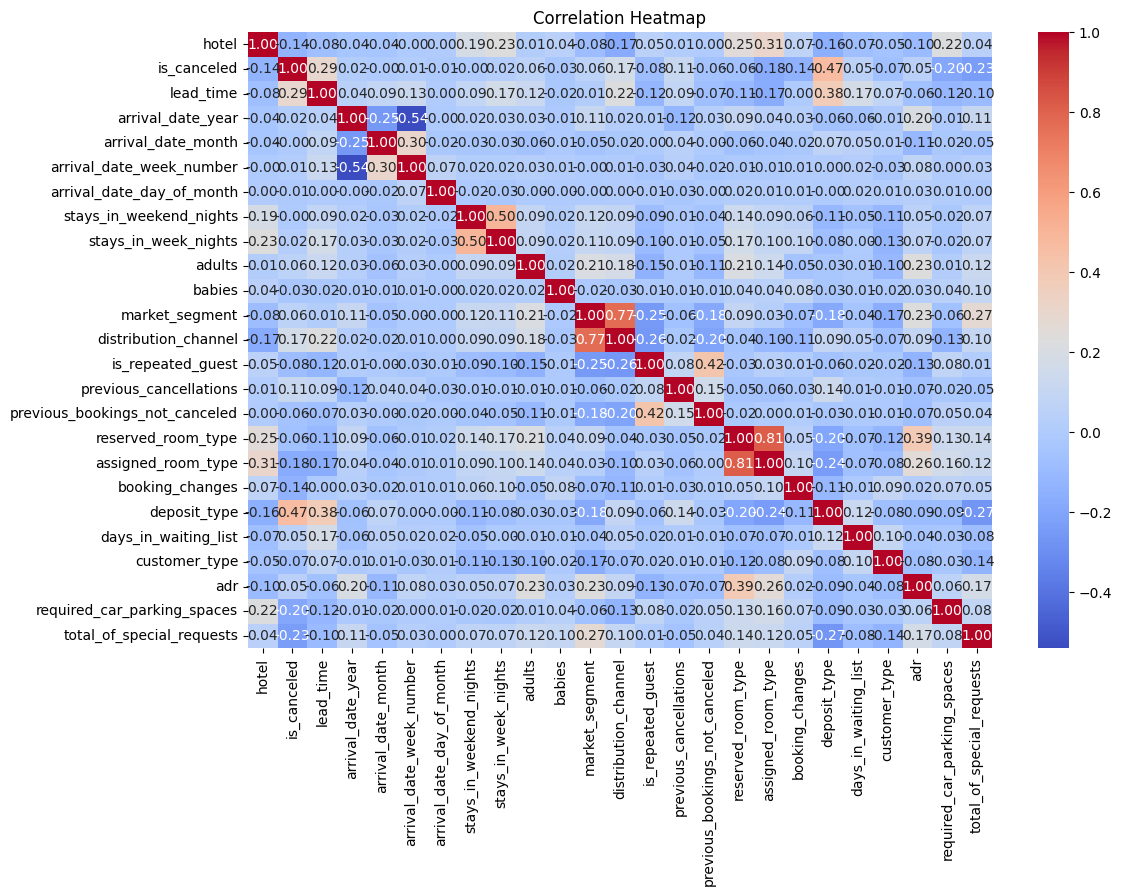

In [28]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature & Target Selection

In [100]:
# Define features and target
X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

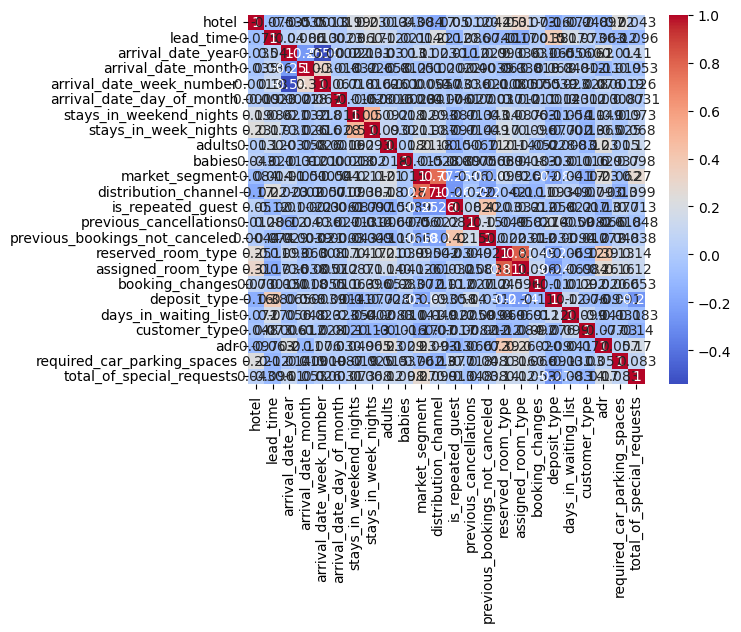

In [101]:
#Heatmap
xy = data.drop(columns=['is_canceled'])
sns.heatmap(xy.corr(), annot=True, cmap='coolwarm')
plt.show()

# Split Train & Test Dataset

In [102]:
# Split the data into training and testing sets (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Show feature train
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
67702,0,64,2017,8,18,6,2,1,3,0,...,0,3,3,0,0,0,2,189.00,0,0
115851,0,34,2017,5,28,10,1,1,2,0,...,0,0,0,0,0,0,2,146.00,0,0
57345,0,8,2016,11,39,24,1,1,2,0,...,0,5,5,0,0,0,2,259.00,0,0
11622,1,251,2017,8,21,21,2,4,2,0,...,0,4,4,0,0,0,2,89.70,0,1
33333,1,23,2017,3,7,18,1,1,2,0,...,0,3,3,0,0,0,2,42.43,0,1


In [104]:
# Show target train
y_train.head()

67702     1
115851    0
57345     1
11622     1
33333     0
Name: is_canceled, dtype: int64

In [105]:
# Show feature test
X_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
30946,1,203,2016,2,49,2,2,5,2,0,...,0,5,5,4,0,0,2,66.8,0,0
40207,0,82,2015,5,29,16,0,3,2,0,...,0,0,0,0,0,0,2,76.5,0,0
103708,0,25,2016,2,53,27,0,3,3,0,...,0,0,9,2,0,0,3,60.0,0,1
85144,0,1,2016,7,11,9,0,1,1,0,...,0,0,0,0,0,0,3,95.0,0,0
109991,0,70,2017,0,16,16,2,2,2,0,...,0,0,0,0,0,0,2,108.0,0,0


In [106]:
# Show target test
y_test.value_counts()

is_canceled
0    14907
1     8971
Name: count, dtype: int64

In [107]:
y_train.value_counts()

is_canceled
0    60259
1    35253
Name: count, dtype: int64

# Model Training
## Train using Logistic Regression

In [108]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
#If you want to save the model for later use!
# import pickle

# with open("/content/sample_data/model.pkl", "wb") as f:
#     pickle.dump(model, f)

In [110]:
#load a pretrained model
# with open("model.pkl", "rb") as f:
#     model = pickle.load(f)

## Model Evaluation

In [111]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     14907
           1       0.68      0.54      0.60      8971

    accuracy                           0.73     23878
   macro avg       0.71      0.69      0.70     23878
weighted avg       0.72      0.73      0.72     23878



## Train using RandomRorest Classifier

In [112]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## evaluation

In [113]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14907
           1       0.88      0.77      0.82      8971

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



a). Class-wise Metrics:

**Class 0:**

- Precision (0.89): Out of all instances predicted as class 0, 88% were correctly identified as class 0.
- Recall (0.82): Out of all actual instances of class 0, the model correctly predicted 82% of them.
- F1-Score (0.85): This is the harmonic mean of precision and recall, indicating a good balance between the two metrics.
- Support (2416): There are 2416 actual instances of class 0 in the dataset.

**Class 1:**

- Precision (0.91): Out of all instances predicted as class 1, 91% were correctly identified as class 1.
- Recall (0.95): Out of all actual instances of class 1, the model correctly predicted 95% of them.
- F1-Score (0.93): This is the harmonic mean of precision and recall for class 1, showing very high performance.
- Support (4839): There are 4839 actual instances of class 1 in the dataset.

b). Overall Metrics:

**Accuracy (0.91):**

- The model correctly predicts the class for 91% of the instances in the dataset, indicating high overall performance.

**Macro Average:**

- Precision (0.90): This is the unweighted average precision across all classes.
- Recall (0.88): This is the unweighted average recall across all classes.
- F1-Score (0.89): This is the unweighted average F1-score across all classes.

**Weighted Average:**

- Precision (0.90): This is the average precision weighted by the number of instances in each class.
- Recall (0.91): This is the average recall weighted by the number of instances in each class.
- F1-Score (0.90): This is the average F1-score weighted by the number of instances in each class.

c). Summary:

- Performance on Class 0: The Random Forest model has a precision of 88% and recall of 82% for class 0, resulting in an F1-score of 85%.
- Performance on Class 1: The model performs excellently on class 1, with a precision of 91% and recall of 95%, leading to an F1-score of 93%.
- Overall Performance: The overall accuracy of the model is 91%, which is a significant improvement compared to the previous results. The macro and weighted averages are both high, indicating good performance across both classes.

# Discussion

- The Random Forest model shows improved performance metrics compared to the logistic regression models.
- The accuracy has increased to 91%, and the precision, recall, and F1-scores for both classes are higher.
- The macro average and weighted average metrics also show a higher level of performance, indicating that the model is better balanced and more effective overall.

# Make Predictions with New Data

In [114]:
X_test.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [115]:
# Function to make predictions with new data
def predict_reservation_cancel(hotel, lead_time, arrival_date_year, arrival_date_month,
       arrival_date_week_number, arrival_date_day_of_month,
       stays_in_weekend_nights, stays_in_week_nights, adults, babies,
       market_segment, distribution_channel, is_repeated_guest,
       previous_cancellations, previous_bookings_not_canceled,
       reserved_room_type, assigned_room_type, booking_changes,
       deposit_type, days_in_waiting_list, customer_type, adr,
       required_car_parking_spaces, total_of_special_requests):
    
    # Create a new DataFrame with the input data
    new_data = pd.DataFrame({
        'hotel': [label_encoders['hotel'].transform([hotel])[0]],
        'lead_time': [lead_time],
        'arrival_date_year': [arrival_date_year],
        'arrival_date_month': [label_encoders['arrival_date_month'].transform([arrival_date_month])[0]],
        'arrival_date_week_number': [arrival_date_week_number],
        'arrival_date_day_of_month': [arrival_date_day_of_month],
        'stays_in_weekend_nights': [stays_in_weekend_nights],
        'stays_in_week_nights': [stays_in_week_nights],
        'adults': [adults],
        'babies': [babies],
        'is_repeated_guest': [is_repeated_guest],
        'previous_cancellations': [previous_cancellations],
        'previous_bookings_not_canceled': [previous_bookings_not_canceled],
        'booking_changes': [booking_changes],
        'reserved_room_type': [label_encoders['reserved_room_type'].transform([reserved_room_type])[0]],
        'assigned_room_type': [label_encoders['assigned_room_type'].transform([assigned_room_type])[0]],
        'market_segment': [label_encoders['market_segment'].transform([market_segment])[0]],
        'distribution_channel': [label_encoders['distribution_channel'].transform([distribution_channel])[0]],
        'deposit_type': [label_encoders['deposit_type'].transform([deposit_type])[0]],
        'days_in_waiting_list': [days_in_waiting_list],
        'customer_type': [label_encoders['customer_type'].transform([customer_type])[0]],
        'adr': [adr],
        'required_car_parking_spaces': [required_car_parking_spaces],
        'total_of_special_requests': [total_of_special_requests]
    })

    # Make prediction
    prediction = model.predict(new_data)[0]
    return label_encoders['is_canceled'].inverse_transform([prediction])[0]

# Gradio interface

In [125]:
data['lead_time'].value_counts()

lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64

In [116]:
# Gradio interface
inputs = [
    gr.Dropdown(label="Hotel", choices=label_encoders['hotel'].classes_.tolist()),
    gr.Number(label="Lead Time"),
    gr.Number(label="Arrival Date Year"),
    gr.Dropdown(label="Arrival Date Month", choices=label_encoders['arrival_date_month'].classes_.tolist()),
    gr.Number(label="Arrival Date Week Number"),
    gr.Number(label="Arrival Date Day of Month"),
    gr.Number(label="Stays in Weekend Nights"),
    gr.Number(label="Stays in Week Nights"),
    gr.Number(label="Adults"),
    gr.Number(label="Babies"),
    gr.Dropdown(label="Market Segment", choices=label_encoders['market_segment'].classes_.tolist()),
    gr.Dropdown(label="Distribution Channel", choices=label_encoders['distribution_channel'].classes_.tolist()),
    gr.Number(label="Is Repeated Guest"),
    gr.Number(label="Previous Cancellations"),
    gr.Number(label="Previous Bookings Not Canceled"),
    gr.Dropdown(label="Reserved Room Type", choices=label_encoders['reserved_room_type'].classes_.tolist()),
    gr.Dropdown(label="Assigned Room Type", choices=label_encoders['assigned_room_type'].classes_.tolist()),
    gr.Number(label="Booking Changes"),
    gr.Dropdown(label="Deposit Type", choices=label_encoders['deposit_type'].classes_.tolist()),
    gr.Number(label="Days in Waiting List"),
    gr.Dropdown(label="Customer Type", choices=label_encoders['customer_type'].classes_.tolist()),
    gr.Number(label="ADR"),
    gr.Number(label="Required Car Parking Spaces"),
    gr.Number(label="Total of Special Requests")
]

outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_reservation_cancel, inputs=inputs, outputs=outputs, title="Hotel Reservation Cancellation Prediction").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/gradio/blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/Users/maohieng/master-degree/learn_ai/.venv/li

# Product Recommendation:
https://www.kaggle.com/code/dinachanthan/product-recommendation-system

# Housing Price Prediction
https://www.kaggle.com/code/muzammilbaloch/house-price-analysis-and-prediction/notebook





In [118]:
#Example of Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=24, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91
